In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR

pd.set_option('display.max.columns', None)

In [4]:
df = pd.read_csv('bmw.csv')
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0


In [5]:
df.isnull().any()

model           False
year            False
price           False
transmission    False
mileage         False
fuelType        False
tax             False
mpg             False
engineSize      False
dtype: bool

In [7]:
df = pd.get_dummies(df, drop_first = True)
df.shape

(10781, 35)

In [8]:
x = df.drop('price', axis = 1)
y= df['price']

In [9]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

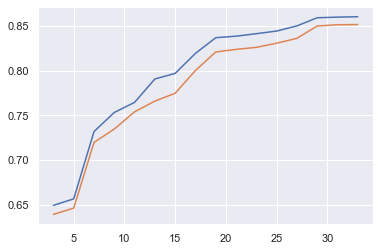

In [21]:
column_names = df.drop('price', axis = 1).columns.values

no_of_features = []
r_squared_train = []
r_squared_test = []

for k in range (3, 35, 2): 
    selector = SelectKBest(f_regression, k=k)
    x_train_transformed = selector.fit_transform(x_train, y_train)
    x_test_transformed = selector.transform(x_test)
    regressor = LinearRegression()
    regressor.fit(x_train_transformed, y_train)
    no_of_features.append(k)
    r_squared_train.append(regressor.score(x_train_transformed, y_train))
    r_squared_test.append(regressor.score(x_test_transformed, y_test))
    
sns.lineplot(x = no_of_features, y = r_squared_train, legend = 'full')
sns.lineplot(x = no_of_features, y = r_squared_test, legend = 'full')

In [22]:
selector = SelectKBest(f_regression, k = 29)
x_train_transformed = selector.fit_transform(x_train, y_train)
x_test_transformed = selector.transform(x_test)
column_names[selector.get_support()]

array(['year', 'mileage', 'tax', 'mpg', 'engineSize', 'model_ 2 Series',
       'model_ 3 Series', 'model_ 7 Series', 'model_ 8 Series',
       'model_ M2', 'model_ M3', 'model_ M4', 'model_ M5', 'model_ X1',
       'model_ X2', 'model_ X3', 'model_ X4', 'model_ X5', 'model_ X6',
       'model_ X7', 'model_ Z3', 'model_ Z4', 'model_ i3', 'model_ i8',
       'transmission_Manual', 'transmission_Semi-Auto', 'fuelType_Hybrid',
       'fuelType_Other', 'fuelType_Petrol'], dtype=object)

In [23]:
def regression_model(model):
    """
    Will fit the regression model passed and will return the regressor object and the score
    """
    regressor = model
    regressor.fit(x_train_transformed, y_train)
    score = regressor.score(x_test_transformed, y_test)
    return regressor, score

In [24]:
model_performance = pd.DataFrame(columns = ["Features", "Model", "Score"])

models_to_evaluate = [LinearRegression(), Ridge(), Lasso(), SVR(), RandomForestRegressor(), MLPRegressor()]

for model in models_to_evaluate:
    regressor, score = regression_model(model)
    model_performance = model_performance.append({"Features": "Linear","Model": model, "Score": score}, ignore_index=True)

model_performance

C:\Users\Muhammad Hazim\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


,Features,Model,Score
0,Linear,LinearRegression(),0.850060
1,Linear,Ridge(),0.849194
2,Linear,Lasso(),0.849933
3,Linear,SVR(),0.065551
4,Linear,"(DecisionTreeRegressor(max_features='auto', ra...",0.937559
5,Linear,MLPRegressor(),0.544238


In [29]:
x_train_k = x_train.loc[:,['year', 'mileage', 'tax', 'mpg', 'engineSize', 'model_ 2 Series',
       'model_ 3 Series', 'model_ 7 Series', 'model_ 8 Series',
       'model_ M2', 'model_ M3', 'model_ M4', 'model_ M5', 'model_ X1',
       'model_ X2', 'model_ X3', 'model_ X4', 'model_ X5', 'model_ X6',
       'model_ X7', 'model_ Z3', 'model_ Z4', 'model_ i3', 'model_ i8',
       'transmission_Manual', 'transmission_Semi-Auto', 'fuelType_Hybrid',
       'fuelType_Other', 'fuelType_Petrol']]

In [30]:
x_test_k = x_test.loc[:,['year', 'mileage', 'tax', 'mpg', 'engineSize', 'model_ 2 Series',
       'model_ 3 Series', 'model_ 7 Series', 'model_ 8 Series',
       'model_ M2', 'model_ M3', 'model_ M4', 'model_ M5', 'model_ X1',
       'model_ X2', 'model_ X3', 'model_ X4', 'model_ X5', 'model_ X6',
       'model_ X7', 'model_ Z3', 'model_ Z4', 'model_ i3', 'model_ i8',
       'transmission_Manual', 'transmission_Semi-Auto', 'fuelType_Hybrid',
       'fuelType_Other', 'fuelType_Petrol']]

In [31]:
reg = LinearRegression()
reg.fit(x_train_k, y_train)
reg.score(x_train_k, y_train)

0.8592999058930919

In [32]:
reg.score(x_test_k, y_test)

0.8500599289508095

In [36]:
reg.predict(x_test_k)

array([17580.77539074, 12859.86431239, 38112.24194233, ...,
       21603.70928343, 50340.69178139, 42485.28138322])

In [2]:
from sklearn.metrics import mean_squared_log_error